In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
df = pd.read_csv("ai_job_trends_dataset.csv")
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master's Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master's Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor's Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master's Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [6]:
df.columns

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

/tmp/ipython-input-9-1067366254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_d')


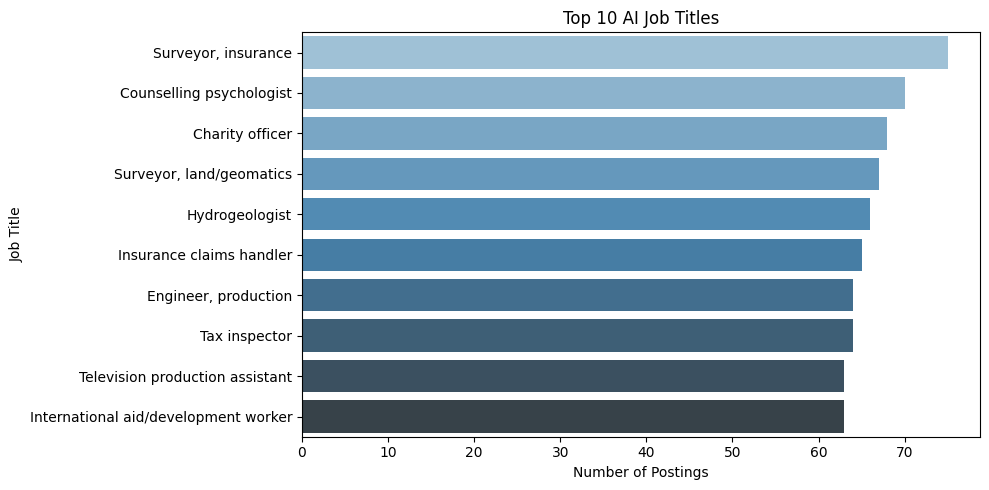

In [9]:
top_jobs = df['Job Title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_d')
plt.title('Top 10 AI Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-597468638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_d')


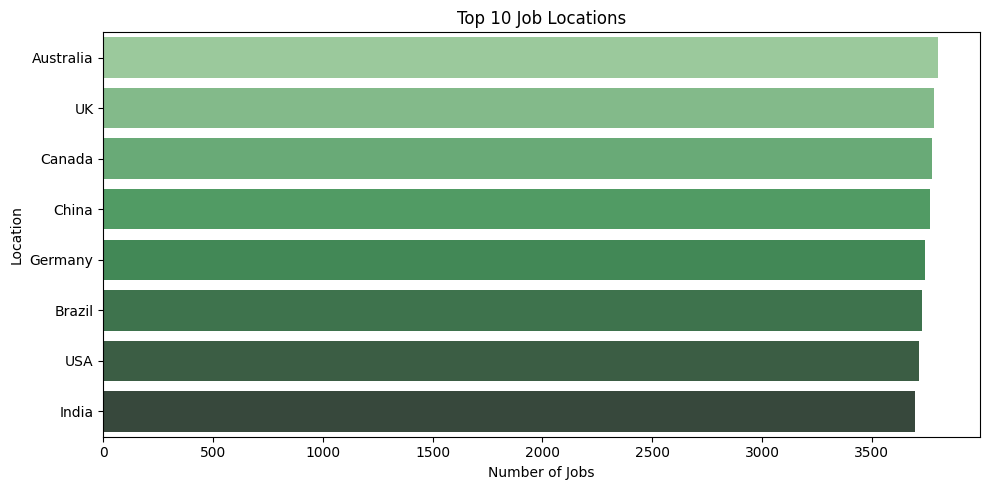

In [16]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_d')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3776617875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='Oranges_d')


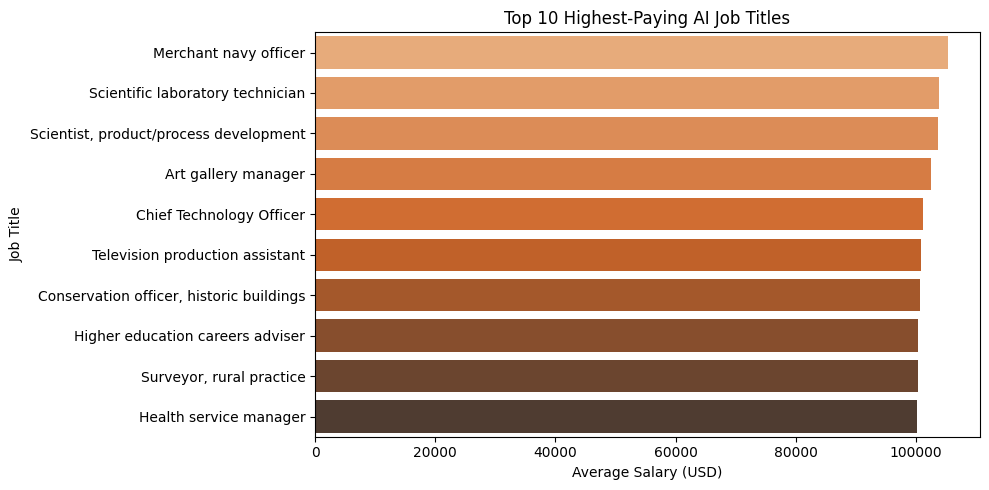

In [22]:
avg_salary = df.groupby('Job Title')['Median Salary (USD)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='Oranges_d')
plt.title('Top 10 Highest-Paying AI Job Titles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


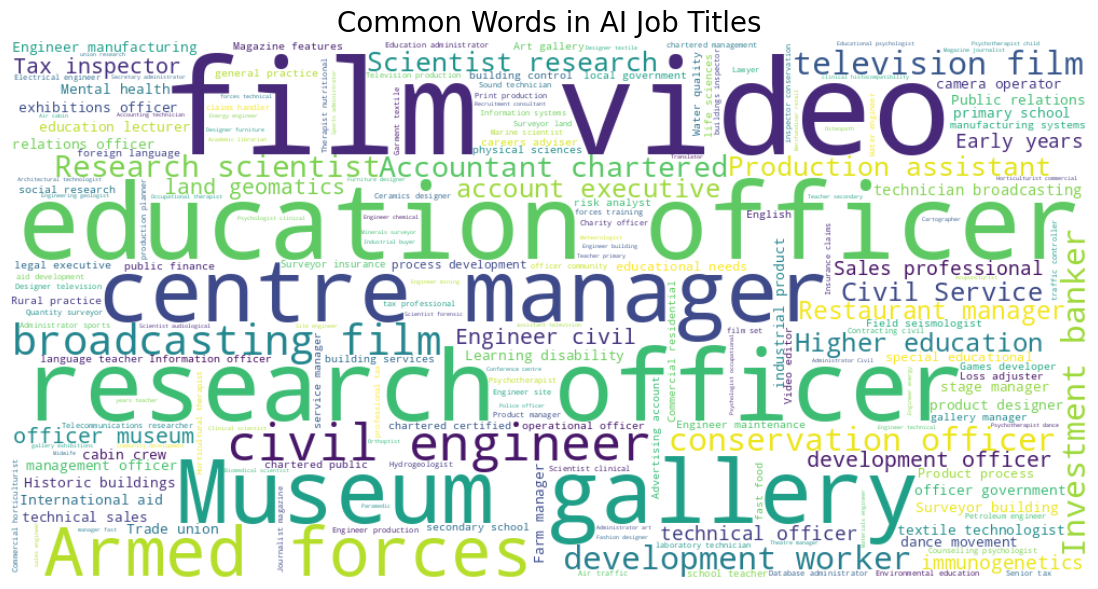

In [25]:
text = " ".join(df['Job Title'].dropna().values)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in AI Job Titles", fontsize=20)
plt.show()

In [26]:
at_risk_jobs = df[['Job Title', 'Automation Risk (%)']].sort_values(by='Automation Risk (%)', ascending=False).head(10)
print(at_risk_jobs)

                                   Job Title  Automation Risk (%)
18947                          Meteorologist                99.99
14665           Fast food restaurant manager                99.99
12714                         Water engineer                99.98
3691                    Designer, multimedia                99.98
3287                    Engineer, electrical                99.98
26124               Advertising art director                99.98
3147             Conservator, museum/gallery                99.97
14757  Medical laboratory scientific officer                99.97
6539                Teacher, adult education                99.97
24346             Horticulturist, commercial                99.97
